<a href="https://colab.research.google.com/github/HydrOpOtesJA99/A.I-learning-CNN-analysis/blob/main/03_Flatten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3_Flatten



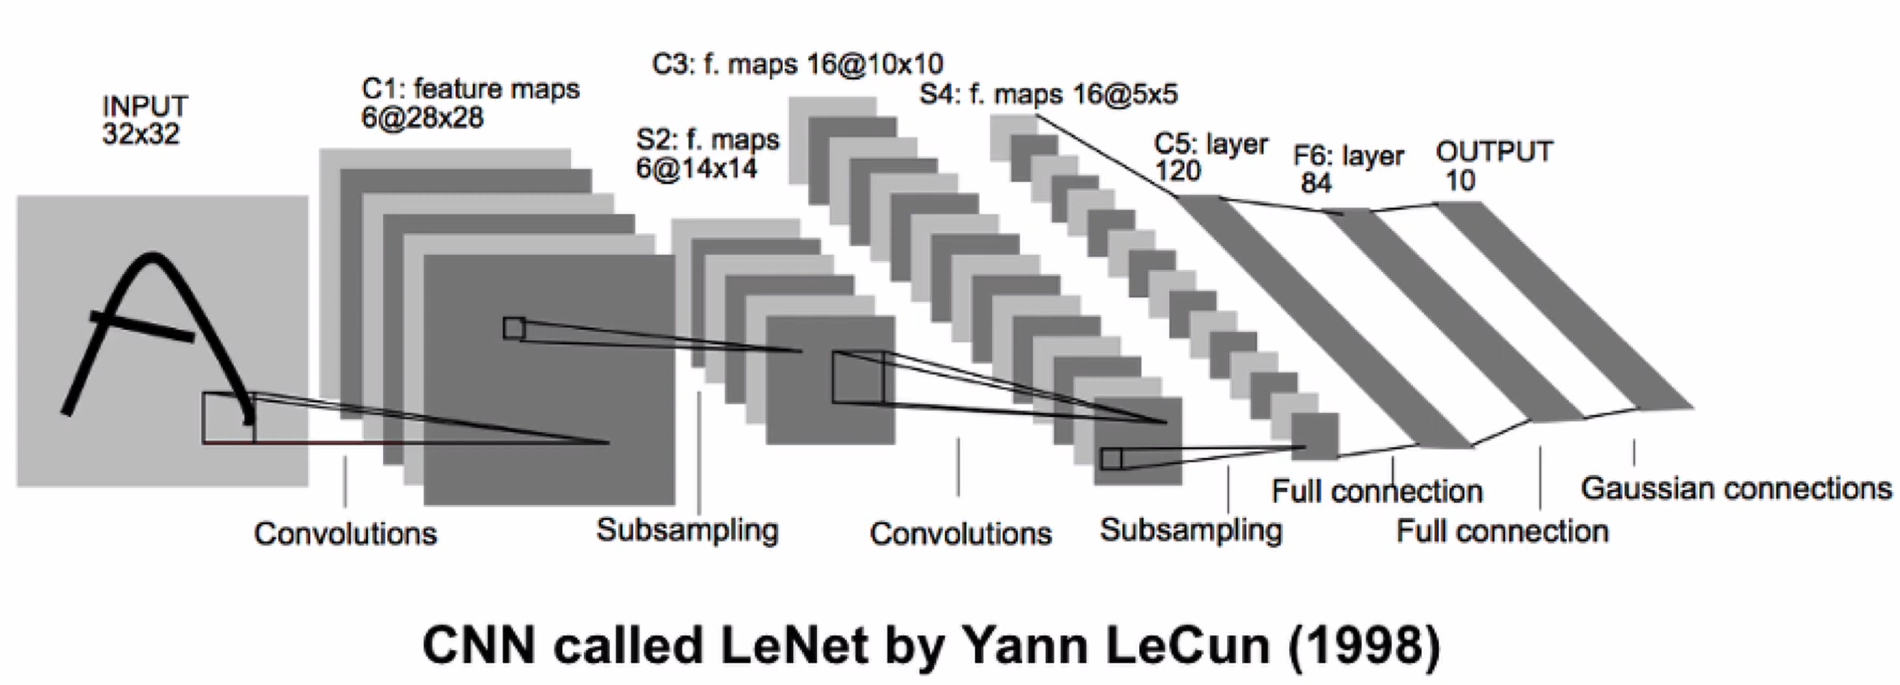



*   예시) CNN 구조로 표현된 LeNet이라는 모델



## 1. 전체 코드

### 1)과거의 데이터 준비

In [ ]:
#1. 과거의 데이터를 준비한다.

(독립, 종속), _ = tf.keras.datasets.mnist.load_dat()
독립 = 독립.reshape(60000, 784)
종속 = pd.get_dummies(종속) # 0~9까지 10개의 범주가 되는 수가 있으니 원핫인코딩으로 종속변수가 10개 column으로 만듦
print(독립.shape, 종속.shape)

```
print(독립.shape)

(60000, 28, 28)

------------------------

독립.reshape(60000,784)
print(독립.shape)

(60000,784) 
```


*   **reshape 명령어**를 통해 (28 x 28) (행 x 열)을 가지던 data를 784개의 column을 가지는 '표'로 바꿀 수 있다 



### 2) 모델의 구조 만들기

In [ ]:
#2. 모델의 구조를 만든다.

X = tf.keras.layers.Input(shape=[784]) # 독립변수 784개
H = tf.keras.layers.Dense(84, activation='swish')(X) # 84개의 은닉층 추가
Y = tf.keras.layers.Dense(10, activation='softmax')(H) # 종속변수 10개
model = tf.keras.models.Model(X, Y)
model.compile(loss='scategorical_crossentropy, metrics='accuracy')



*   **84개의 은닉층 추가의 의미**



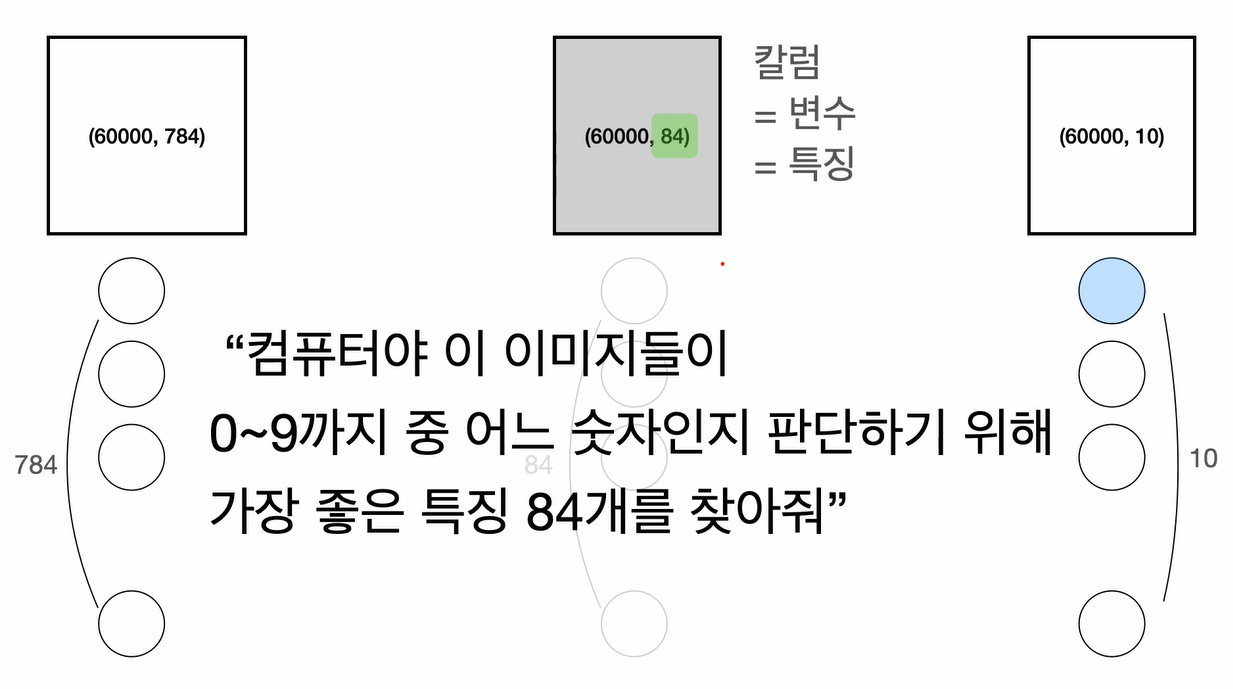

### 3) 데이터로 모델 학습

In [ ]:
#3. 데이터로 모델을 학습(FIT)한다.

model.fit(독립, 종속, epochs=10)

### 4) 모델을 이용

In [ ]:
#4. 모델을 이용한다.

print("Predictions: ", model.predict(독립[0:5]))

## 2. Flatten 추가 전체 코드

### 1)과거의 데이터 준비

In [ ]:
#1. 과거의 데이터를 준비한다.

(독립, 종속), _ = tf.keras.datasets.mnist.load_dat()
# 독립 = 독립.reshape(60000, 784) -> reshape 제거
종속 = pd.get_dummies(종속) 
print(독립.shape, 종속.shape)

# print 결과: (60000, 28, 28), (60000, 1)

### 2) 모델의 구조 만들기 (Flatten 코드 추가)

In [ ]:
#2. 모델의 구조를 만든다.

# X = tf.keras.layers.Input(shape=[784]) -> 독립변수 insert 형식 교체
X = tf.keras.layers.Input(shape=[28, 28]) # 독립변수 28, 28개

H = tf.keras.layers.Flatten()(X) # reshape의 기능을 모델내에서 동작케 한다.

H = tf.keras.layers.Dense(84, activation='swish')(H) #  X -> H 교체
Y = tf.keras.layers.Dense(10, activation='softmax')(H) # 종속변수 10개
model = tf.keras.models.Model(X, Y)
model.compile(loss='scategorical_crossentropy, metrics='accuracy')

### 3) 데이터로 모델 학습

In [ ]:
#3. 데이터로 모델을 학습(FIT)한다.

model.fit(독립, 종속, epochs=10)

### 4) 모델을 이용

In [ ]:
#4. 모델을 이용한다.

print("Predictions: ", model.predict(독립[0:5]))